# Lineare gewöhnliche Differentialgleichungen 1. Ordnung - Vorlesung

**Themenüberblick:**

- konstante Koeffizienten: allgemeine Lösung, Beispiele und Anwendungen
- allgemeine Koeffizientenfunktionen: allgemeine Lösung, Beispiele und Anwendungen

**zusätzliche Unterlagen:** `15_Differentialgleichungen_Teil_1-scan.pdf`

In [1]:
%pylab inline
%config InlineBackend.figure_format = 'svg'

Populating the interactive namespace from numpy and matplotlib


## Konstante Koeffizienten

Eine lineare GDGL 1. Ordnung mit konstanten Koeffizienten $a$ und $b$ hat die Gleichung

$$\boxed{\dot{y} + ay = b}.$$

**allgemeine Lösung:**

Der uninteressantere Fall $a=0$ hat die Lösung $y(t) = bt + C$ mit der Integrationskonstanten $C$. Im Folgenden betrachten wir den  interessanteren Fall $a\neq0$:

Wir überprüfen, ob die DGL $\dot{y} + ay = b$ exakt ist, und schreiben sie dafür zu 

$$\text{d}y + (ay-b)\,\text{d}t =0$$

um. Das Rotationskriterium liefert

$$\begin{pmatrix} \frac{\partial}{\partial y} \\ \frac{\partial}{\partial t}\end{pmatrix}\times\begin{pmatrix} 1\\ay - b \end{pmatrix}=a-0=a.$$

Die DGL ist also nicht exakt, da wir $a\neq 0$ annehmen.

Herausheben von $(ay - b)$ aus $\text{d}y + (ay-b)\,\text{d}t =0$ liefert

$$(ay-b)\left[ \frac{1}{ay-b}\,\text{d}y + \text{d}t\right] = 0.$$

Wenn der erste Faktor $ay-b$ Null ist, erhalten wir die konstante Lösung $y(t) = \frac{b}{a}$, deren Ableitung $\dot{y}(t)$ Null ist. Daher wird diese Lösung als **steady state** Lösung bezeichnet. 
Null-Setzen des zweiten Faktors $\frac{1}{ay-b}\,\text{d}y + \text{d}t$ liefert nun eine exakte DGL, da 

$$\begin{pmatrix} \frac{\partial}{\partial y} \\ \frac{\partial}{\partial t}\end{pmatrix}\times\begin{pmatrix} \frac{1}{ay-b} \\ 1 \end{pmatrix}= 0 - 0 = 0.$$

Ihre Lösung lautet $y(t)= Ce^{-at} + \frac{b}{a}$ für $C\neq 0$, denn:

$$\begin{align}
\frac{1}{ay - b}\text{d}y + \text{d}t  &= 0 \\
\text{d} \left(\frac{1}{a} \ln|ay - b| + t \right) &= 0 \\
\frac{1}{a} \ln|ay - b| + t &= C_1 \\
\ln|ay - b| &= C_2 - at \\
|ay - b| &= e^{C_2} e^{-at} \\
ay - b &= \pm e^{C_2} e^{-at} \\
ay - b &= C_3 e^{-at} \\
y(t) &= C e^{-at} + \frac{b}{a}
\end{align}$$

Insgesamt lautet die allgemeine Lösung $y(t)= Ce^{-at} + \frac{b}{a}$, wobei $C$ auch Null sein kann und dem Anfangswert $y(0)$ minus $\frac{b}{a}$ entspricht:

$$\boxed{y(t)= \left(y(0)- \frac{b}{a}\right)e^{-at} + \frac{b}{a}}$$

Wir schreiben dieses Ergebnis zusätzlich in der alternativen Form:

$$\boxed{y(t)= y(0)e^{-at} + \frac{b}{a}\left( 1 - e^{-at} \right)}$$

- Falls $a<0$ ist, divergiert $y(t)$, ausser $y(0)=\frac{b}{a}$.
- Falls $a>0$ ist, konvergiert $y(t)$ vom Anfangswert $y(0)$ zum steady state Wert $\frac{b}{a}$. Der Anteil $y(0)e^{-at}$ beginnt bei $y(0)$ und geht gegen Null. Der Anteil $\frac{b}{a}\left( 1 - e^{-at} \right)$ beginnt bei Null und geht gegen $\frac{b}{a}$.

In [2]:
from ipywidgets import interact

In [3]:
def fun(a, b, y0):
    t = linspace(0, 20, num = 100)
    
    figure(figsize=(6,4))
    y = (y0 - b/a)*exp(-a*t) + b/a
    plot(t, y)
    plot(t, b/a*ones(shape(t)),'--')
    ylim(-7, 7)
    grid(True)
    show()

interact(fun, a=(0.05, 1.5, 0.1), b=(-2, 2, 0.1), y0=(-5, 5, 0.1)); 

interactive(children=(FloatSlider(value=0.7500000000000001, description='a', max=1.5, min=0.05), FloatSlider(v…

**Beispiele und Anwendungen:**

**Elektrischer Schaltkreis:** Der Strom $I(t)$ als Funktion der Zeit $t$ erfüllt in einem elektrischen Schaltkreis mit vorgegebener konstanter Spannung $U$ und in Serie geschaltetem ohmschen Widerstand $R$ und Induktivität $L$ die DGL 

$$L\dot{I} + RI = U.$$ 

Nach Umformen zu $\dot{I} + \frac{R}{L}I = \frac{U}{L}$ können wir die Lösungsformel verwenden. 
Die Lösung lautet 

$$I(t)= I(0)e^{-\frac{R}{L}t} + \frac{U}{R}\left(1 - e^{-\frac{R}{L}t}\right).$$

Der Strom konvergiert zum steady state Wert $\frac{U}{R}$.

**Verschmutztes Wasser:** Ein See enthält $4\cdot10^7$ Liter reines Wasser zum Zeitpunkt $t=0$. Anschließend fließt verschmutztes Wasser in den See, das 0.67 Liter Schadstoff und 10 Liter reines Wasser pro Sekunde in den See bringt. Wir nehmen an, dass sich das eingebrachte verschmutzte Wasser sofort mit dem Seewasser vermischt. Pro Sekunde fließen 10.67 Liter aus dem See hinaus. Wir bestimmen die Menge an Schadstoff im See als Funktion der Zeit. 
Mit $y(t)$ bezeichnen wir die Liter Schadstoff für Zeitpunkte $t\geq 0$. Der Anteil an Schadstoff pro Liter Seewasser beträgt $\frac{y(t)}{4\cdot10^7}$. 
    
+ Aufstellen der DGL: Die Änderung der Schadstoffmenge im See ist gleich der Abflussmenge an Schadstoff pro Zeit plus der Einflußmenge pro Zeit, d. h. $\dot{y} = -10.67\frac{y}{4\cdot10^7} + 0.67$. Die Terme der DGL haben die Einheit Liter pro Sekunde.
+ Lösung: $y(t) = \frac{0.67}{10.67}4\cdot10^7(1 - e^{-\frac{10.67}{4\cdot10^7}t})$
+ Der steady state der Schadstoffmenge $y(t)$ ist $\frac{0.67}{10.67}4\cdot10^7 \approx 2.51\cdot10^6$.
+ Der steady state der Schadstoffkonzentration $\frac{y(t)}{4\cdot10^7}$ ist $\frac{0.67}{10.67} \approx 0.063$.

Wann werden 90 % des steady states erreicht? Antwort: nach ca. 100 Tagen:

$$\begin{align}
1 - e^{-\frac{10.67}{4\cdot10^7}t} &= 0.9 \\
e^{-\frac{10.67}{4\cdot10^7}t} &= 0.1 \\
-\frac{10.67}{4\cdot10^7}t &= \ln(0.1) \\
t &= 862314\,\text{Sekunden} \approx 100\,\text{Tage}
\end{align}$$

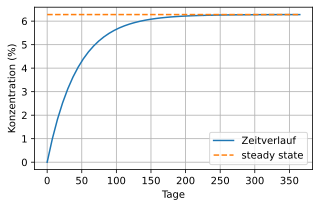

In [4]:
a = 10.67/4e7
b = 0.67
y0 = 0
t = linspace(0,365) # Tage
y = ((y0 - b/a)*exp(-a*24*60*60*t) + b/a)/4e7*100  # Konzentration in %
y_steady_state = b/a/4e7*100*ones(shape(t))  # steady state Konzentration in %

figure(figsize=(5,3))
plot(t, y, label='Zeitverlauf')
plot(t, y_steady_state, '--', label='steady state')
xlabel('Tage')
ylabel('Konzentration (%)')
legend(loc='best')
grid(True)

**Raumtemperatur:** Um Mitternacht beträgt die Raumtemperatur in der FH Vorarlberg 20 °C und außen -5 °C. Die Heizung fällt aus. Zwei Stunden später beträgt die Raumtemperatur nur noch 10 °C. Die Außentemperatur bleibt konstant auf -5 °C. Wir bestimmen den Zeitverlauf der Raumtemperatur.

Dazu verwenden wir $T(t)$ für die Raumtemperatur zum Zeitpunkt $t$ und $T_A$ für die Außentemperatur. Newtons Abkühlgesetz besagt, dass
$\dot{T}(t) = -\lambda (T(t) - T_A)$. Wir wissen, dass $T(0)=20$ und $T_A=-5$, aber der Parameter $\lambda$ ist vorerst unbekannt. Die Parameter $a$ und $b$ der allgemeinen Form $\dot{y} + ay = b$ identifizieren wir als $a=\lambda$ und $b = \lambda T_A$. Daher lautet die allgemeine Lösung 

$$T(t) = \left( T(0)- T_A \right) e^{-\lambda t} + T_A.$$

Aus der Bedingung $T(2)=10$ können wir $\lambda$ bestimmen:

$$\begin{align}
10 &= (20 + 5) e^{-\lambda 2} - 5 \\
15 &= 25e^{-\lambda 2} \\
e^{-\lambda 2} &= 0.6 \\
-\lambda 2&= \ln(0.6) \\
\lambda &= -0.5\ln(0.6) \approx 0.2554
\end{align}$$

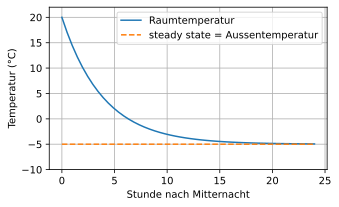

In [5]:
a = -0.5*log(0.6)
b = -0.5*log(0.6)*(-5)
T0 = 20
t = linspace(0, 24) # Stunden
T = (T0 - b/a)*exp(-a*t) + b/a
T_steady_state = b/a*ones(shape(t))

figure(figsize=(5,3))
plot(t, T, label='Raumtemperatur')
plot(t, T_steady_state, '--', label='steady state = Aussentemperatur')
xlabel('Stunde nach Mitternacht')
ylabel('Temperatur (°C)')
legend(loc='best')
ylim(-10, 22)
grid(True)

 Wann beträgt die Raumtemperatur nur noch 5 °C?
 
$$\begin{align}
 5 &= 25e^{-\lambda t} - 5 \\
10 &= 25e^{-\lambda t} \\
e^{-\lambda t} &= 0.4 \\
-\lambda t &= \ln(0.4) \\
t &= -\frac{\ln(0.4)}{\lambda} \approx 3.587
\end{align}$$
 
Antwort: ca. 3.6 Stunden nach Mitternacht.

## Allgemeine Koeffizientenfunktionen

Eine lineare GDGL 1. Ordnung mit Koeffizientenfunktionen $a(t)$ und $b(t)$ hat die Gleichung

$$\boxed{\dot{y} + a(t)y = b(t)}.$$

**allgemeine Lösung:**

Der uninteressantere Fall $a(t)=0$ hat die Lösung $y(t) = B(t) + C$ mit $B(t)$ einer Stammfunktion von $b(t)$ und einer Integrationskonstanten $C$. Im Folgenden betrachten wir den interessanteren Fall $a(t)\neq0$, d. h. die Funktion $a(t)$ ist nicht zu allen Zeitpunkten $t$ gleich Null:

Wir überprüfen, ob die DGL exakt ist, und schreiben sie dafür zu 

$$\text{d}y + \left[a(t)y - b(t)\right]\text{d}t = 0$$

um. Das Rotationskriterium liefert

$$\begin{pmatrix} \frac{\partial}{\partial y} \\ \frac{\partial}{\partial t}\end{pmatrix}\times\begin{pmatrix} 1\\a(t)y - b(t) \end{pmatrix}=a(t) - 0 = a(t).$$

Die DGL ist nicht exakt, da wir $a(t)\neq 0$ annehmen.

Wir multiplizieren $\text{d}y + \left[a(t)y - b(t)\right]\text{d}t =0$ mit dem integrierenden Faktor $e^{A(t)}$, wobei $A(t)$ eine Stammfunktion von $a(t)$ ist. Die resultierende DGL 
$e^{A(t)}\text{d}y + e^{A(t)}\left[a(t)y - b(t)\right]\text{d}t =0$ ist exakt. Wir lösen sie in den folgenden (zugegeben nicht sehr offensichtlichen) Schritten

$$\begin{align}
e^{A(t)}\text{d}y + e^{A(t)}\left[a(t)y - b(t)\right]\text{d}t &= 0 \\
e^{A(t)}\text{d}y + e^{A(t)}a(t)y\,\text{d}t &= e^{A(t)}b(t)\,\text{d}t \\
\text{d}\left( e^{A(t)}y\right) &= e^{A(t)}b(t)\,\text{d}t \\
\int\text{d}\left( e^{A(t)}y\right) &= \int e^{A(t)}b(t)\,\text{d}t + C \\
e^{A(t)}y &= \int e^{A(t)}b(t)\,\text{d}t + C \\
y &= e^{-A(t)} \left[ \int e^{A(t)}b(t)\,\text{d}t + C \right]
\end{align}$$

Die allgemeine Lösung mit Integrationskonstante $C$ lautet also 

$$\boxed{y(t) = e^{-A(t)} \left[ \int e^{A(t)}b(t)\,\text{d}t + C \right]}.$$

Diese Formel liefert auch für den Fall $a(t)=0$ die Lösung, allerdings auf eine umständliche Art.

**Beispiel und Anwendung:**

Der Strom $I(t)$ als Funktion der Zeit $t$ erfüllt in einem elektrischen Schaltkreis mit vorgegebener zeitabhängiger Spannung $U(t) = U_0 \sin(\omega t)$ und in Serie geschaltetem ohmschen Widerstand $R$ und Induktivität $L$ die DGL 

$$L\dot{I} + RI = U_0 \sin(\omega t).$$ 

Nach Division durch $L$ erhalten wir die DGL 

$$\dot{I} + \frac{R}{L}I = \frac{U_0}{L} \sin(\omega t),$$ 

sodass wir folgende Identifikationen mit der allgemeinen Form $\dot{y} + a(t)y = b(t)$ machen können:

- $a(t) = \frac{R}{L}$
- $b(t) =  \frac{U_0}{L} \sin(\omega t)$

Mit Hilfe der Integralformel

$$\int e^{rt}\sin(st)\,\text{d}t = \frac{1}{r^2 + s^2}e^{rt}\left[ r\sin(st) - s\cos(st) \right]$$

für Konstanten $a$ und $b$ läßt sich die Lösung der DGL mit der Lösungsformel bestimmen:

$$I(t) = \frac{U_0}{L}\frac{1}{(R/L)^2 + \omega^2}\left( \frac{R}{L}\sin(\omega t) - \omega\cos(\omega t) \right) + Ce^{-\frac{R}{L}t}.$$